In [ ]:
!pip install shap

In [ ]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")

In [ ]:
# Some important features according to feature importance graphs
impgini = ['TARGET_ABUSER','BMI','SEX','INCOME','AGE','EDUCA','AIDTST4','MARITAL','EMPLOY1','EXERCISE','HAVARTH','ACESWEAR','PHYHLTH','PERSDOC3','ACEDIVRC',
           'METSTAT','ACEDEPRS','ACEADSAF','ACEDRINK','MENHLTH','ADDEPEV3']
impshap = ['TARGET_ABUSER','SEX','AIDTST4','HAVARTH','EDUCA','ADDEPEV3','ACEDIVRC','ACEDEPRS','EXERCISE','ACEDRINK','METSTAT','BMI','CANCER','INCOME','PHYHLTH',
           'ASTHMS1','URBSTAT','LTASTH1','GENHLTH','SENIOR','PERSDOC3']

In [ ]:
# Creating a deep copies of the DataFrame for testing purposes
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)
df3 = df.copy(deep=True)
df4 = df.copy(deep=True)

In [ ]:
df1 = df1[impgini]
df3 = df3[impshap]

##1. Hierarchical Clustering Map

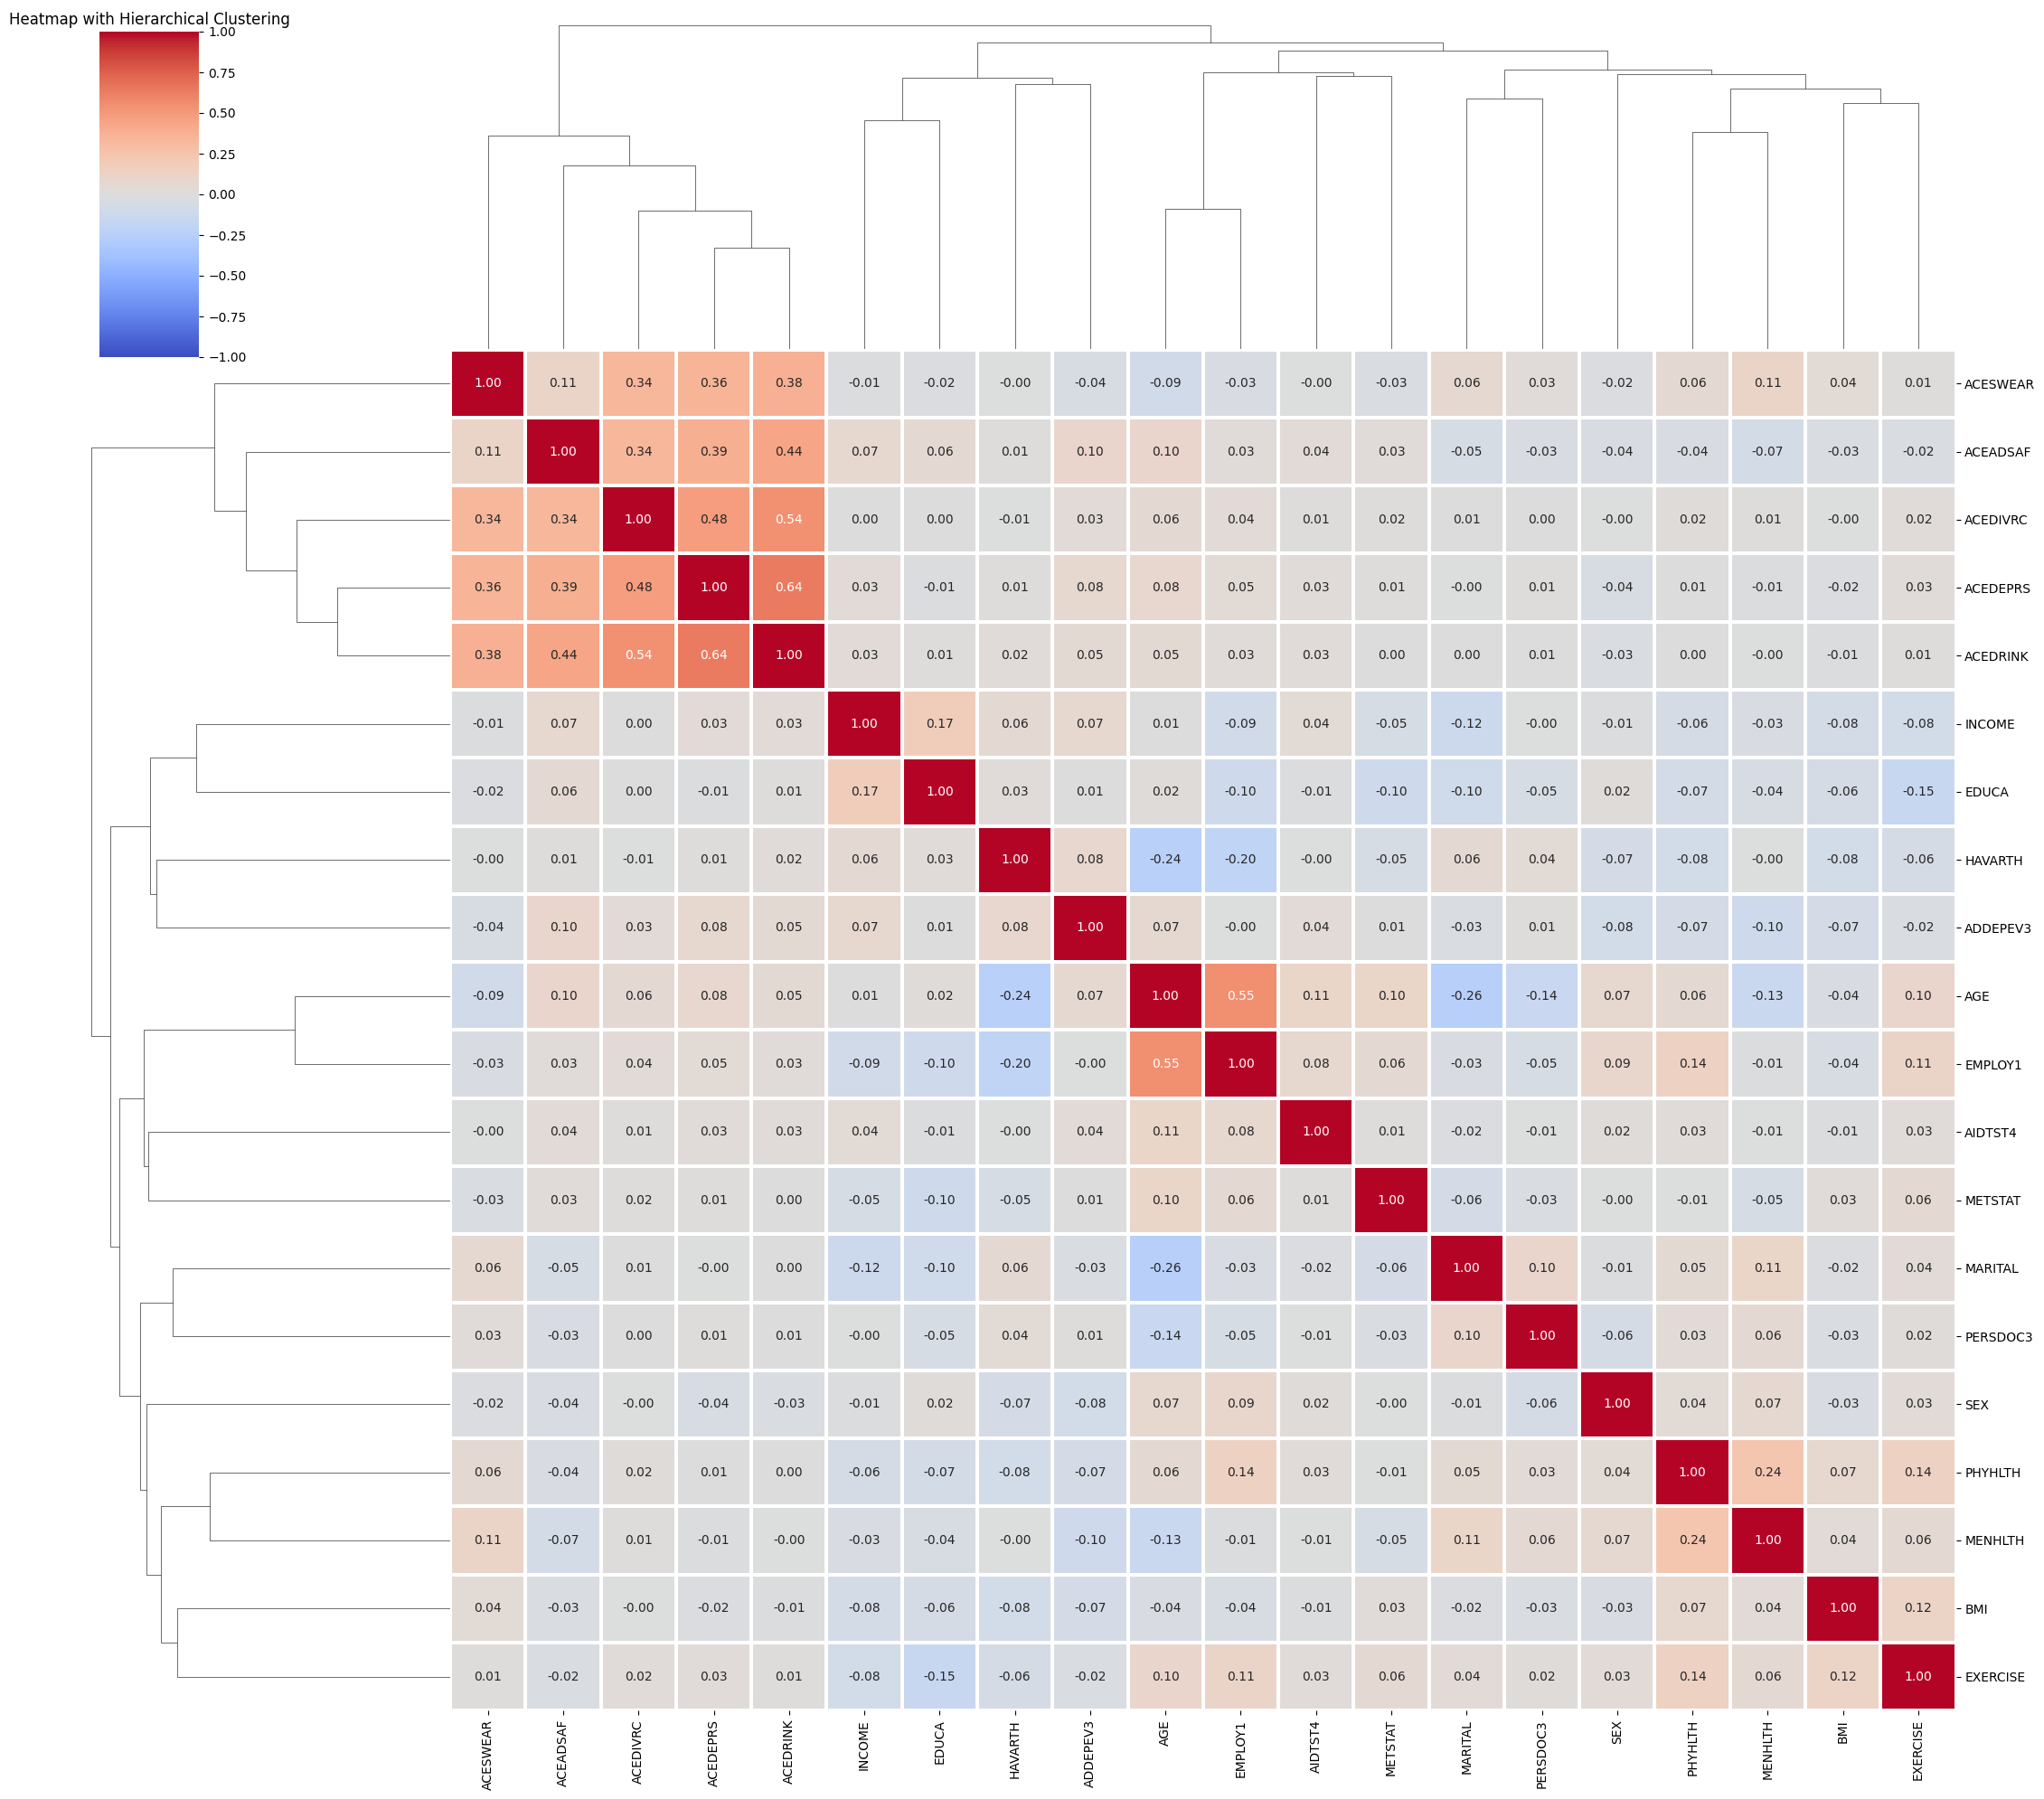

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

feature1 = df1.drop(['TARGET_ABUSER'], axis=1)
# Compute the correlation matrix
corr = feature1.corr()

# Perform hierarchical clustering
row_linkage = hierarchy.linkage(corr, method='average')
col_linkage = hierarchy.linkage(corr.T, method='average')

# Reorder the rows and columns of the correlation matrix based on the hierarchical clustering
row_order = hierarchy.dendrogram(row_linkage, no_plot=True)['leaves']
col_order = hierarchy.dendrogram(col_linkage, no_plot=True)['leaves']

# Plot the heatmap with reordered rows and columns
#plt.figure(figsize=(20, 20))
sns.clustermap(corr.iloc[row_order, col_order],
            vmax = 1,
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=1.5,
            figsize = (22, 20),
            xticklabels=corr.columns[col_order],
            yticklabels=corr.columns[row_order])
plt.title('Heatmap with Hierarchical Clustering')
plt.show()

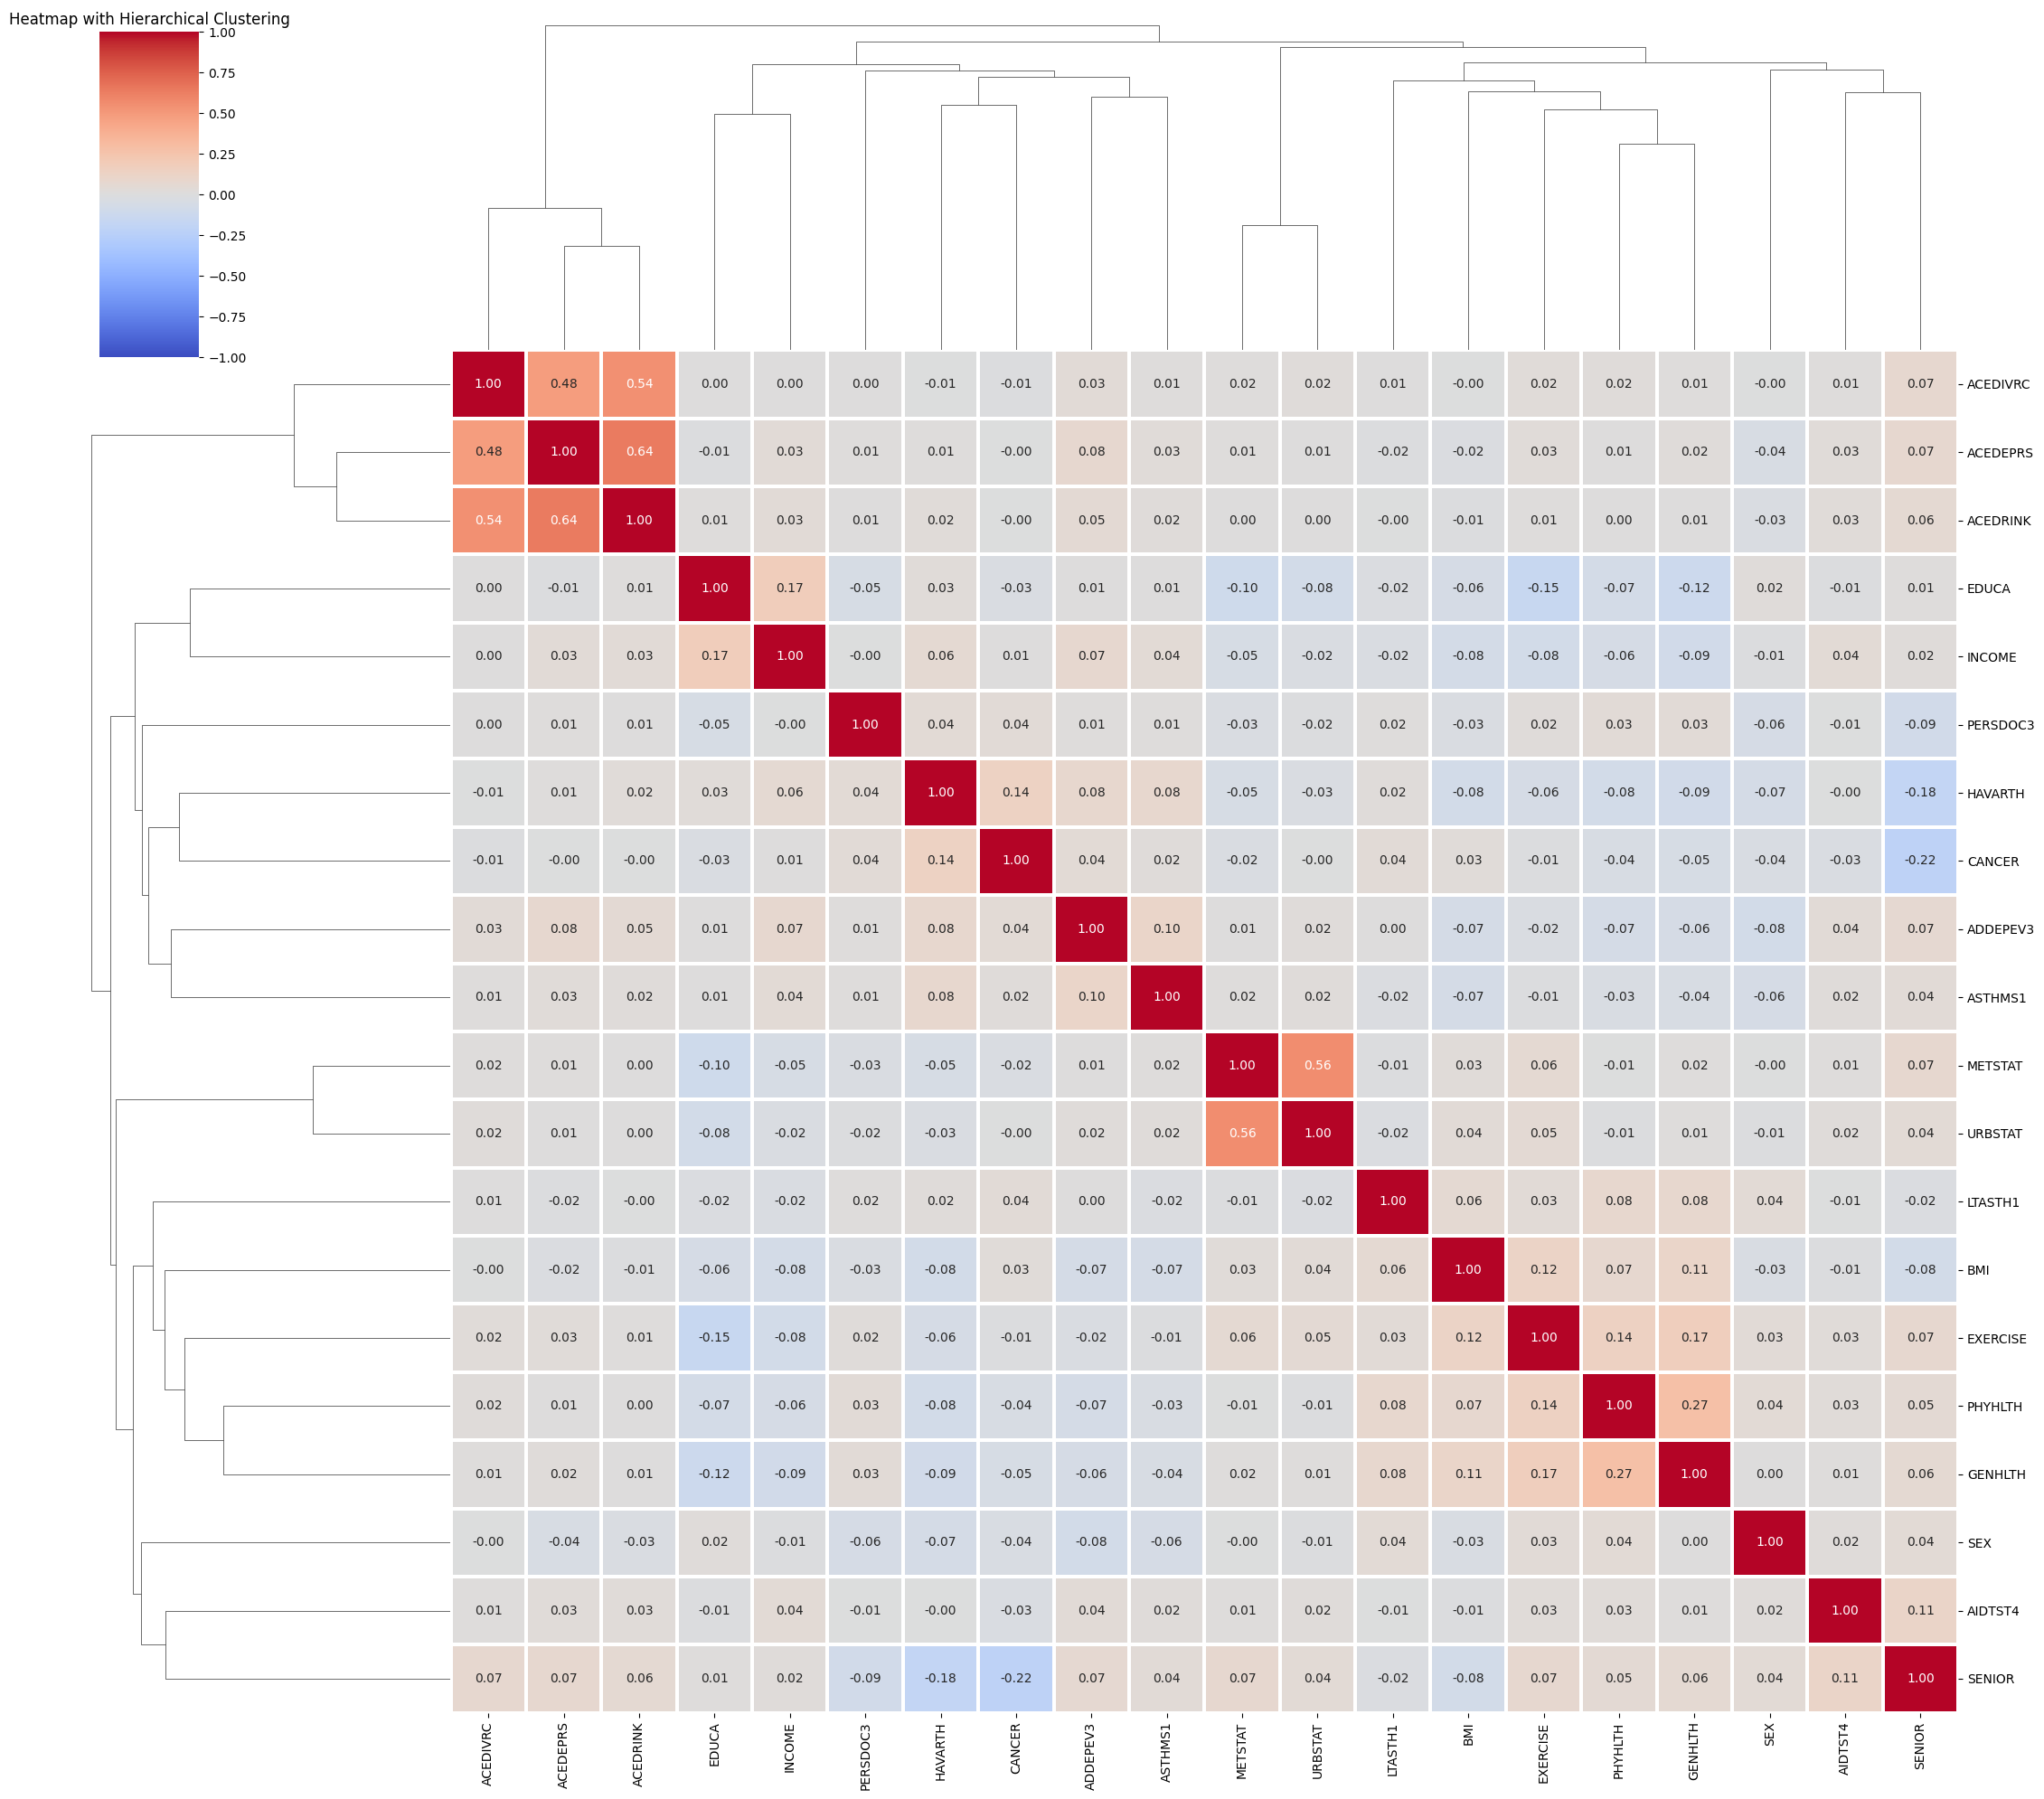

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

feature3 = df3.drop(['TARGET_ABUSER'], axis=1)
# Compute the correlation matrix
corr = feature3.corr()

# Perform hierarchical clustering
row_linkage = hierarchy.linkage(corr, method='average')
col_linkage = hierarchy.linkage(corr.T, method='average')

# Reorder the rows and columns of the correlation matrix based on the hierarchical clustering
row_order = hierarchy.dendrogram(row_linkage, no_plot=True)['leaves']
col_order = hierarchy.dendrogram(col_linkage, no_plot=True)['leaves']

# Plot the heatmap with reordered rows and columns
#plt.figure(figsize=(20, 20))
sns.clustermap(corr.iloc[row_order, col_order],
            vmax = 1,
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            linewidths=1.5,
            figsize = (22, 20),
            xticklabels=corr.columns[col_order],
            yticklabels=corr.columns[row_order])
plt.title('Heatmap with Hierarchical Clustering')
plt.show()

##2. Network Graph

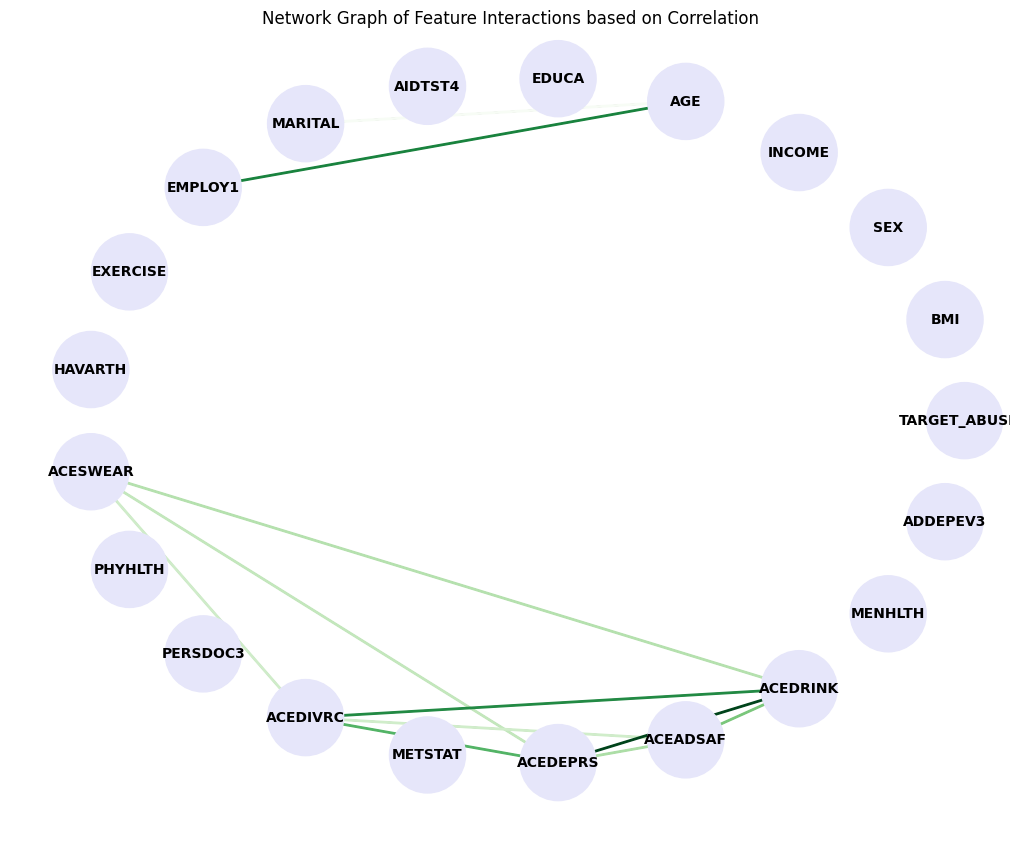

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df[ace] is a DataFrame with the relevant data
correlation_matrix = df1.corr()

# Create a graph from the correlation matrix
G = nx.Graph()

# Add nodes to the graph
for feature in correlation_matrix.columns:
    G.add_node(feature)

# Add edges to the graph based on correlation values
threshold = 0.25  # Set a threshold for correlation values
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j:
            correlation = correlation_matrix.loc[feature1, feature2]
            if abs(correlation) >= threshold:
                G.add_edge(feature1, feature2, weight=correlation)

# Assign colors to the nodes based on whether they are in the highly correlated group
node_colors = []
for node in G.nodes():
        node_colors.append('lavender')  # Default color for other nodes

# Draw the graph
plt.figure(figsize=(10, 8))

# Use circular layout
pos = nx.circular_layout(G)

# Draw nodes and edges with different styles based on weights
edges = G.edges(data=True)
weights = [abs(edge[2]['weight']) for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Greens, width=2)

plt.title('Network Graph of Feature Interactions based on Correlation')
plt.show()


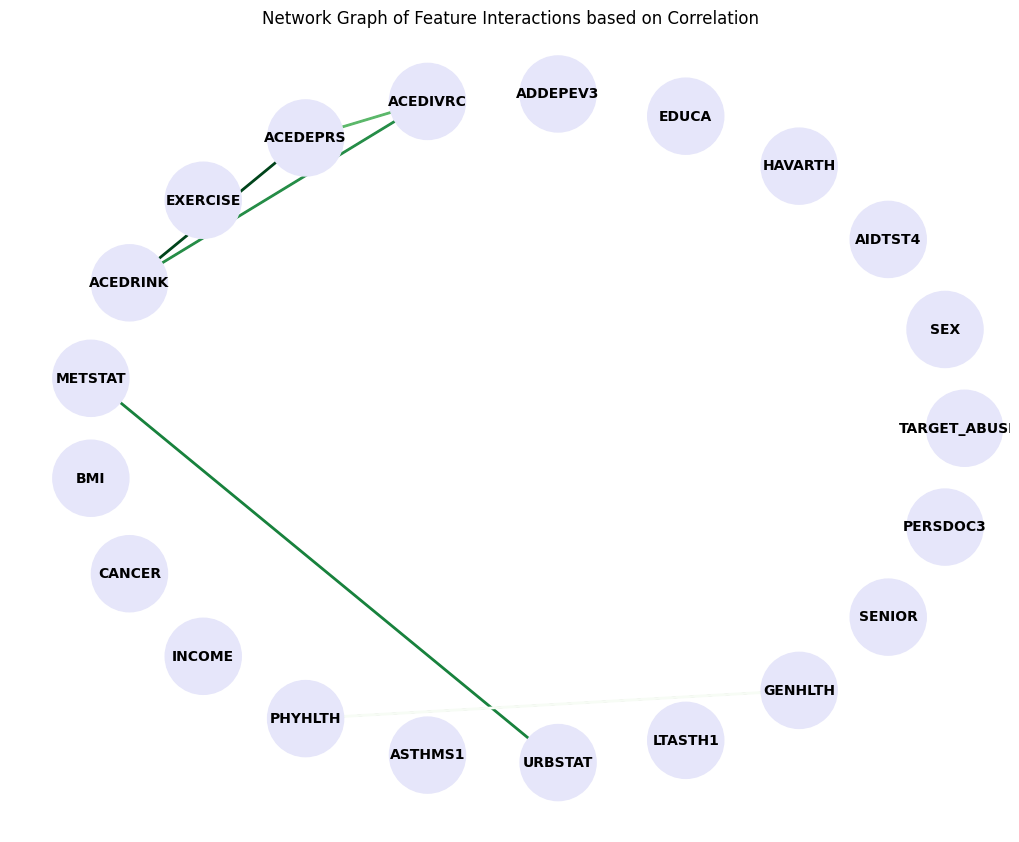

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df[ace] is a DataFrame with the relevant data
correlation_matrix = df3.corr()

# Create a graph from the correlation matrix
G = nx.Graph()

# Add nodes to the graph
for feature in correlation_matrix.columns:
    G.add_node(feature)

# Add edges to the graph based on correlation values
threshold = 0.25  # Set a threshold for correlation values
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j:
            correlation = correlation_matrix.loc[feature1, feature2]
            if abs(correlation) >= threshold:
                G.add_edge(feature1, feature2, weight=correlation)

# Assign colors to the nodes based on whether they are in the highly correlated group
node_colors = []
for node in G.nodes():
        node_colors.append('lavender')  # Default color for other nodes

# Draw the graph
plt.figure(figsize=(10, 8))

# Use circular layout
pos = nx.circular_layout(G)

# Draw nodes and edges with different styles based on weights
edges = G.edges(data=True)
weights = [abs(edge[2]['weight']) for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Greens, width=2)

plt.title('Network Graph of Feature Interactions based on Correlation')
plt.show()


##3. Feature Interactions

In [ ]:
#Importing the data so as to use the same data with every run
X_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_train.xlsx")
y_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_train.xlsx")
X_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_test.xlsx")
y_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_test.xlsx")

In [ ]:
X_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
X_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
X_test.set_index('Index', inplace=True)
X_train.set_index('Index', inplace=True)
y_test.set_index('Index', inplace=True)
y_train.set_index('Index', inplace=True)

In [ ]:
y_train = y_train.TARGET_ABUSER
y_test = y_test.TARGET_ABUSER

In [ ]:
X_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=400, random_state=32)
# fiting the model to data
rf.fit(X_train, y_train)
#print(rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_rf)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Importing shap library
import shap
shap.initjs()

In [ ]:
# Use SHAP to explain the model's predictions
explainer_shap = shap.TreeExplainer(rf)

In [ ]:
# Calculate SHAP interaction values for the test data
shap_interaction_values = explainer_shap.shap_interaction_values(X_test)

In [ ]:
# Save SHAP interaction values to a file
np.save('/content/drive/MyDrive/Capstone_Project/Backup/shap_interaction_values.npy', shap_interaction_values)